In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import json

In [13]:
# Set the seaborn style and palette
sns.set(style='darkgrid')
new_palette = ['#c44e52', 'black']
sns.set_palette(new_palette)

In [14]:
def load_metrics(directory):
    all_data = []
    
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r') as f:
                data = json.load(f)
                data['filename'] = filename  # Add the filename to identify each run
                all_data.append(data)
    
    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(all_data)
    
    return df

In [29]:
# Load data
directory = './NN/trial_monday_22_07_airport/'
df_1 = load_metrics(directory)

directory = './NN/trial_monday_22_07_airport_1/'
df_2 = load_metrics(directory)

df = pd.concat([df_1, df_2], axis=0, ignore_index=True)

# df

In [36]:
df.columns

Index(['epsilon', 'clipping_value', 'T', 'lr', 'network_width', 'grad_norms',
       'train_losses', 'test_losses', 'test_accuracies', 'filename'],
      dtype='object')

In [32]:
# Convert the lists in the DataFrame to separate rows for training losses and test accuracies
df_expanded_train = df.explode('train_losses')
df_expanded_train['epoch'] = df_expanded_train.groupby('filename').cumcount() + 1



df_expanded_test = df.explode('test_accuracies')
df_expanded_test['epoch'] = df_expanded_test.groupby('filename').cumcount() + 1

In [33]:
# df_expanded_train

In [34]:
df_expanded_train = df_expanded_train.loc[df_expanded_train['T'] == 80]
# df_expanded_train = df_expanded_train.loc[df_expanded_train['lr'] == 1000]

df_expanded_test = df_expanded_test.loc[df_expanded_test['T'] == 80]
# df_expanded_test = df_expanded_test.loc[df_expanded_test['network_width'] == 1000]

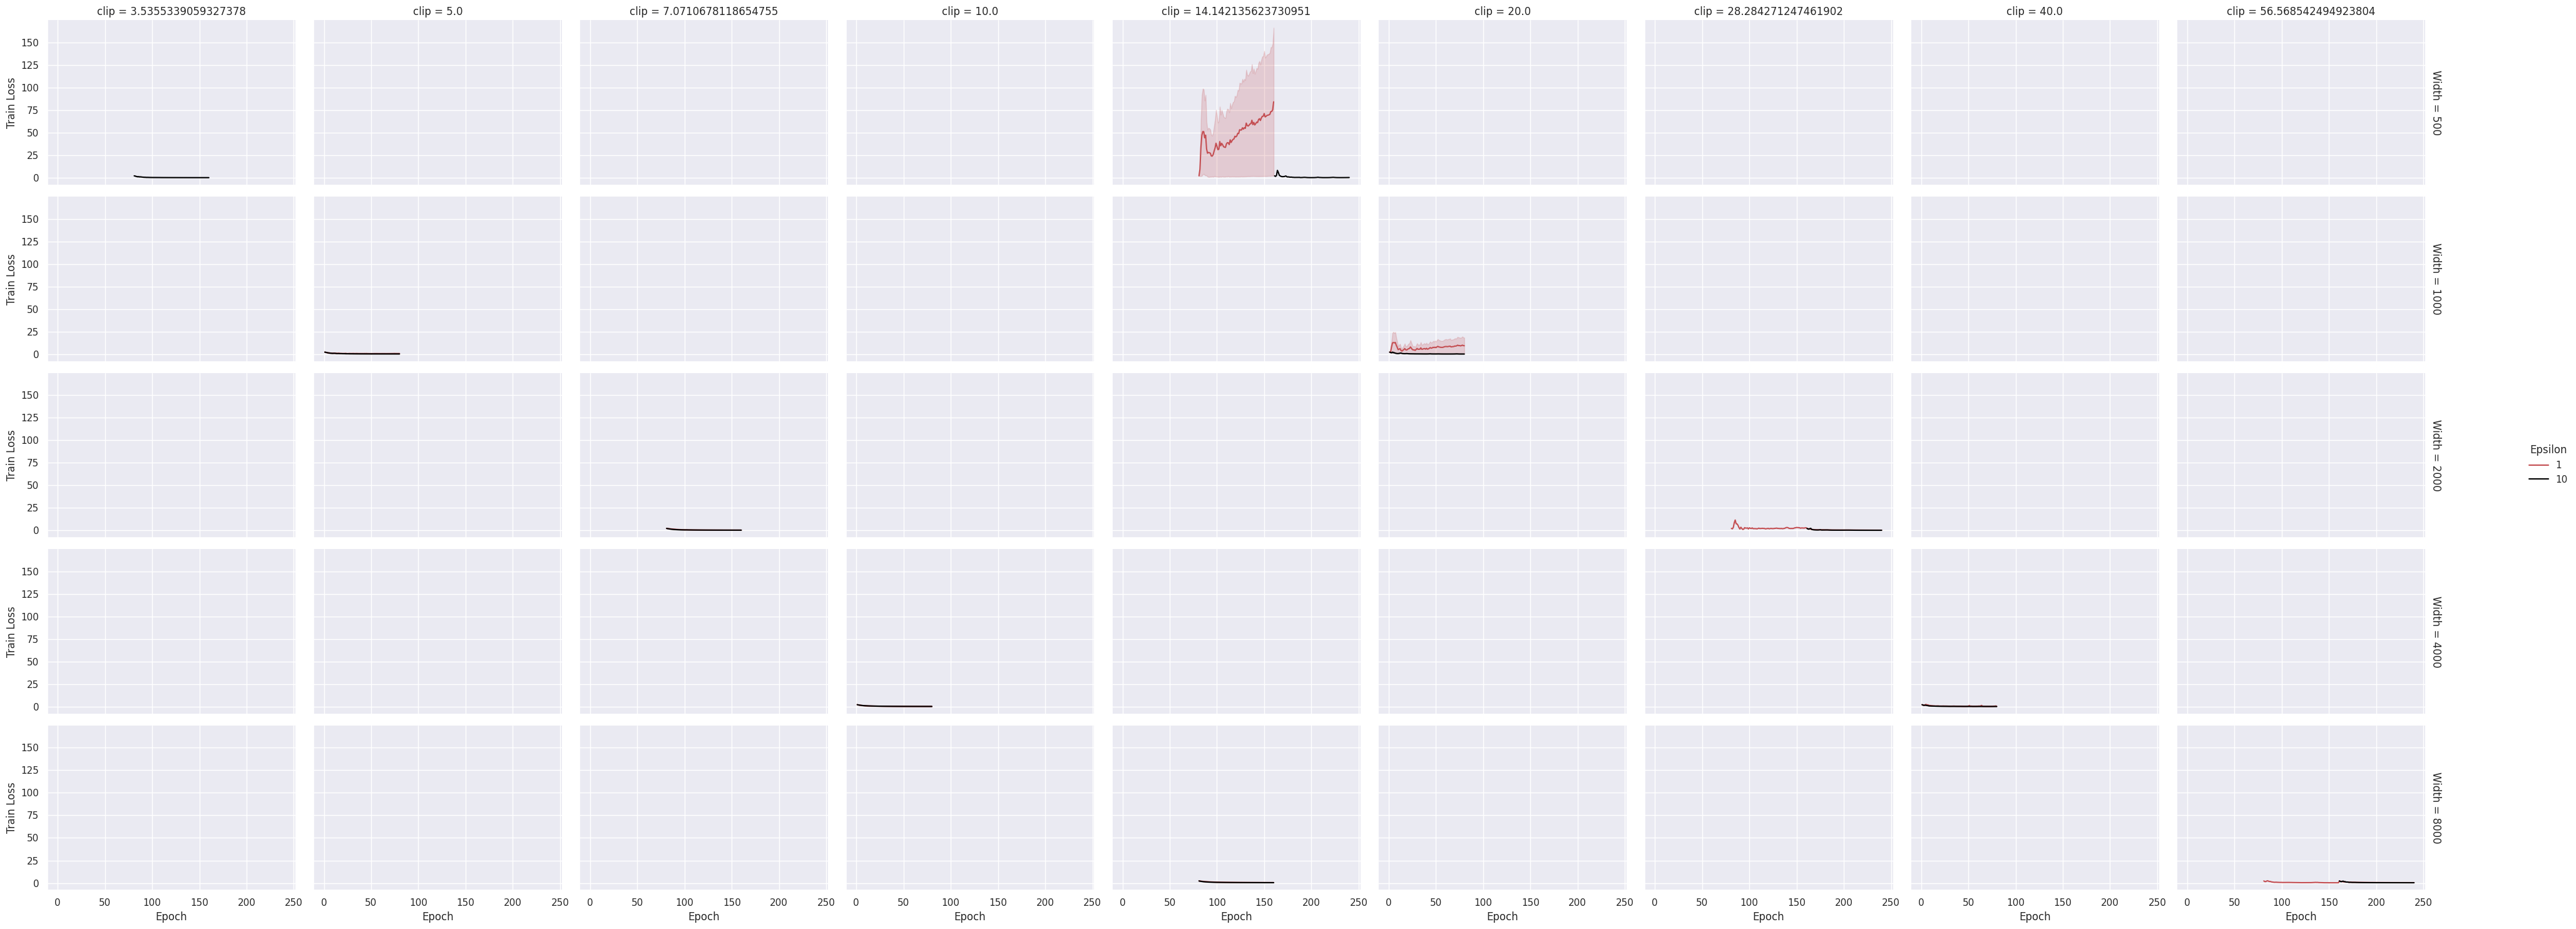

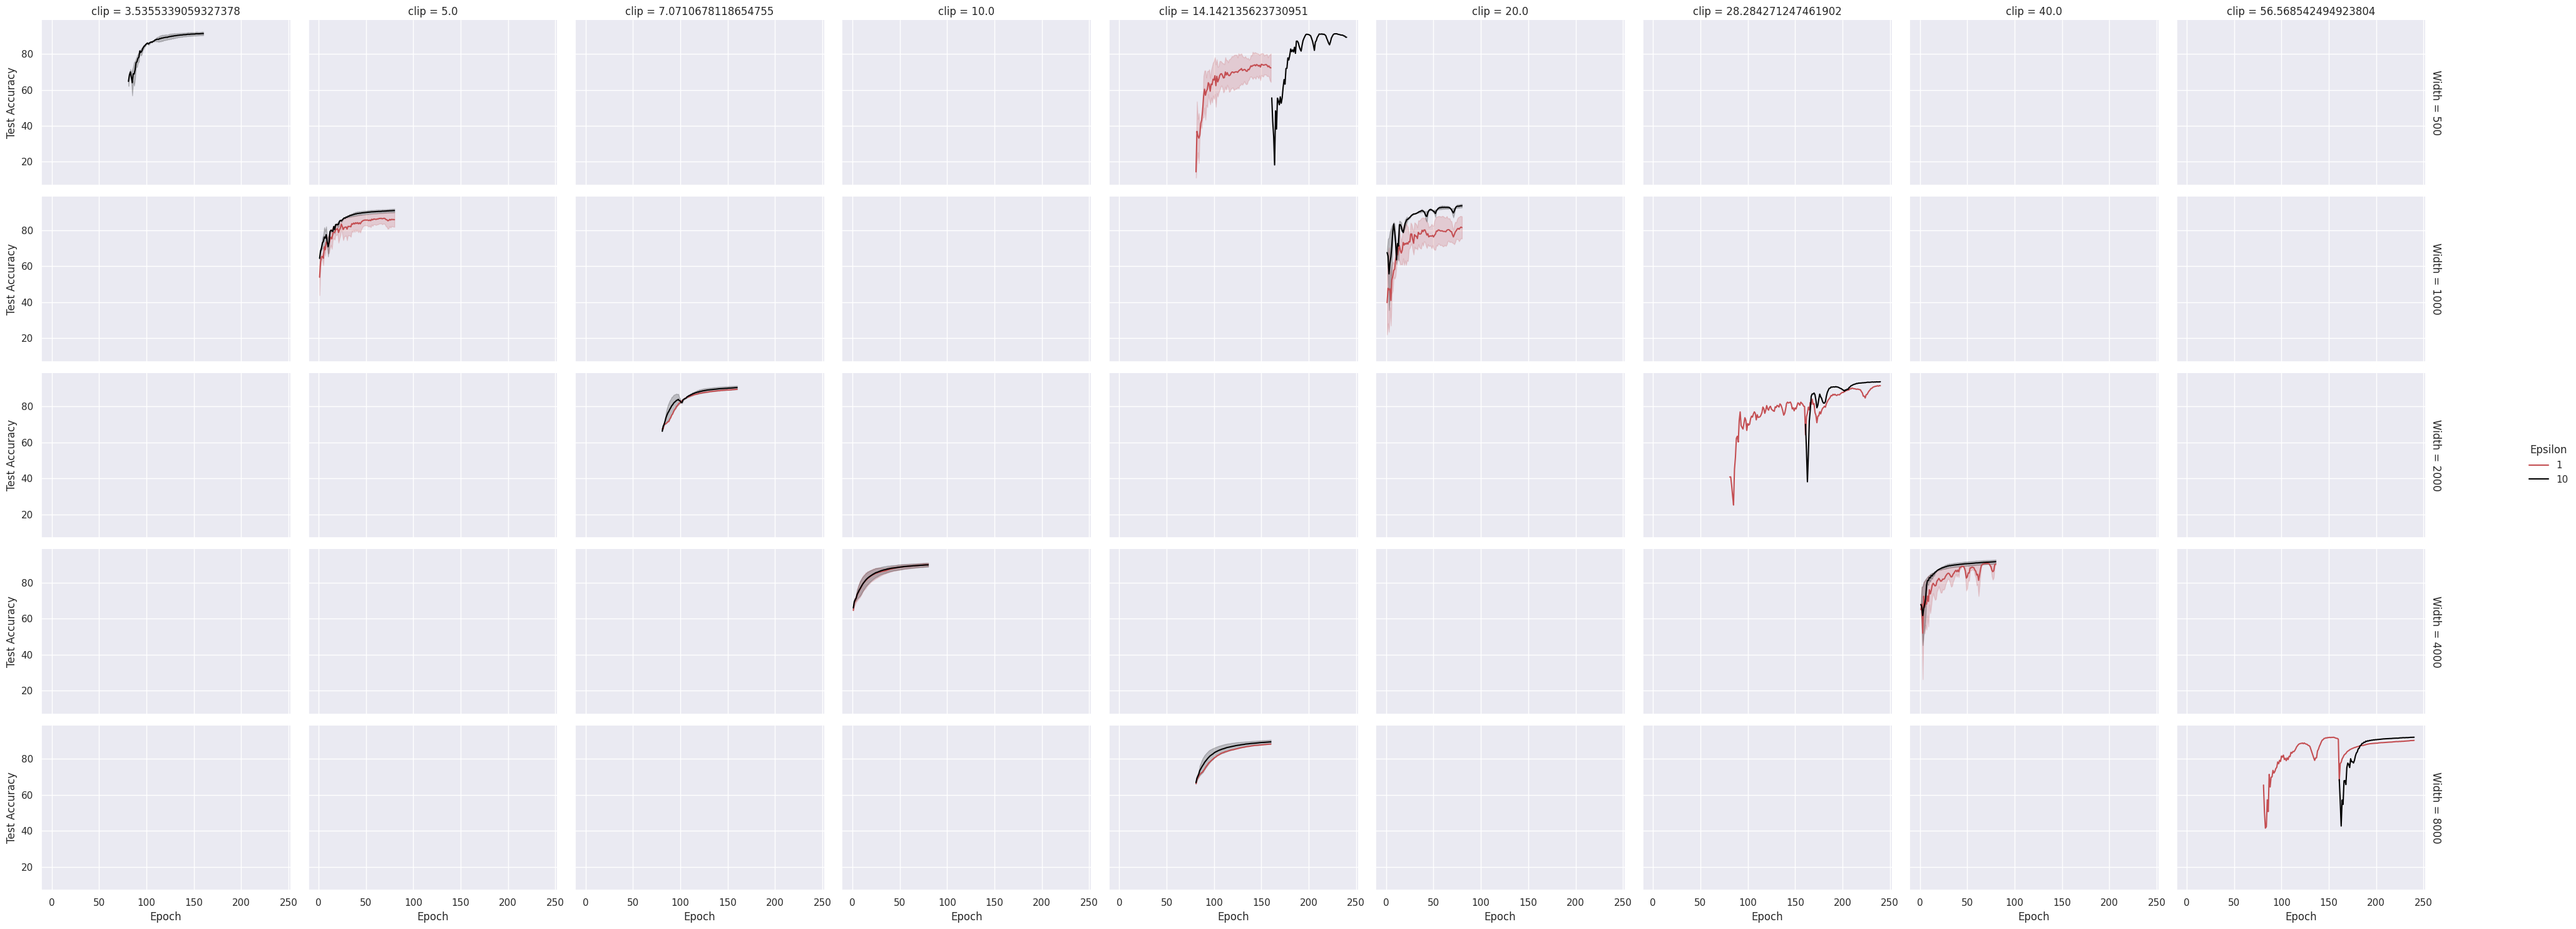

In [35]:
### Plot training losses
g_train = sns.FacetGrid(df_expanded_train, col='clipping_value', row='network_width', hue='epsilon', margin_titles=True, height=3, aspect=1.5)
g_train.map(sns.lineplot, 'epoch', 'train_losses')
g_train.add_legend(title='Epsilon')
g_train.set_axis_labels('Epoch', 'Train Loss')
g_train.set_titles(row_template='Width = {row_name}', col_template='clip = {col_name}')
plt.show()

# Plot test accuracies
g_test = sns.FacetGrid(df_expanded_test, col='clipping_value', row='network_width', hue='epsilon', margin_titles=True, height=3, aspect=1.5)
g_test.map(sns.lineplot, 'epoch', 'test_accuracies')
g_test.add_legend(title='Epsilon')
g_test.set_axis_labels('Epoch', 'Test Accuracy')
g_test.set_titles(row_template='Width = {row_name}', col_template='clip = {col_name}')
plt.show()

In [143]:
# import os
# import json

# def add_learning_rate(directory):
#     a = [1e-5, 3e-6, 1e-6]
    
#     for filename in os.listdir(directory):
#         if filename.endswith(".json"):
#             filepath = os.path.join(directory, filename)
#             file_index = int(filename[:-5])
#             lr = a[(file_index // 2) % 3]
            
#             # Load the JSON file
#             with open(filepath, 'r') as f:
#                 data = json.load(f)
            
#             # Add the learning rate
#             data['learning_rate'] = lr
            
#             # Save the updated JSON file
#             with open(filepath, 'w') as f:
#                 json.dump(data, f, indent=4)
            
#             print(f"Updated {filename} with learning rate {lr}")

# # Example usage:
# directory = './NN/trial_wed_1/'
# add_learning_rate(directory)


In [20]:
# Ensure 'learning_rate' is added to your JSON files before running this cell

# Convert the lists in the DataFrame to separate rows for gradient norms
df_expanded_grad = df.explode('grad_norms')
df_expanded_grad['epoch'] = df_expanded_grad.groupby('filename').cumcount() + 1

# Separate gradient norms for the two layers
df_expanded_grad['grad_norm_layer1'] = df_expanded_grad['grad_norms'].apply(lambda x: x[0])
df_expanded_grad['grad_norm_layer2'] = df_expanded_grad['grad_norms'].apply(lambda x: x[1])

# Filter the DataFrame for T = 80 and network_width = 2048
df_expanded_grad = df_expanded_grad.loc[df_expanded_grad['T'] == 160]
df_expanded_grad = df_expanded_grad.loc[df_expanded_grad['network_width'] == 1000]

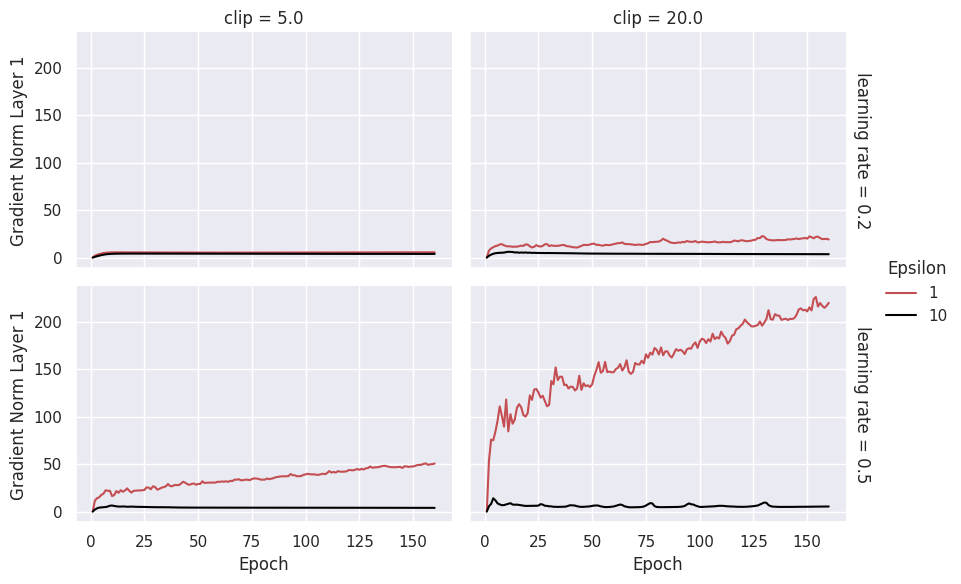

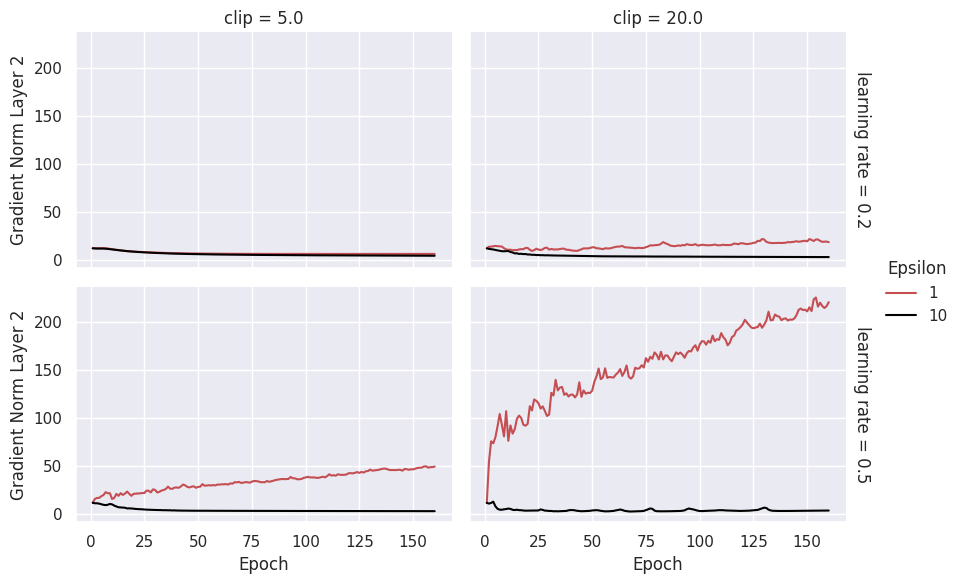

In [22]:
# # Ensure 'learning_rate' is added to your JSON files before running this cell

# # Convert the lists in the DataFrame to separate rows for gradient norms
# df_expanded_grad = df.explode('grad_norms')
# df_expanded_grad['epoch'] = df_expanded_grad.groupby('filename').cumcount() + 1

# # Separate gradient norms for the two layers
# df_expanded_grad['grad_norm_layer1'] = df_expanded_grad['grad_norms'].apply(lambda x: x[0])
# df_expanded_grad['grad_norm_layer2'] = df_expanded_grad['grad_norms'].apply(lambda x: x[1])

# # Filter the DataFrame for T = 80 and network_width = 2048
# df_expanded_grad = df_expanded_grad.loc[df_expanded_grad['T'] == 80]
# df_expanded_grad = df_expanded_grad.loc[df_expanded_grad['network_width'] == 512]

# Plot gradient norms for the first parameter
g_grad1 = sns.FacetGrid(df_expanded_grad, col='clipping_value', row='lr', hue='epsilon', margin_titles=True, height=3, aspect=1.5)
g_grad1.map(sns.lineplot, 'epoch', 'grad_norm_layer1')
g_grad1.add_legend(title='Epsilon')
g_grad1.set_axis_labels('Epoch', 'Gradient Norm Layer 1')
g_grad1.set_titles(row_template='learning rate = {row_name}', col_template='clip = {col_name}')
plt.show()

# Plot gradient norms for the second parameter
g_grad2 = sns.FacetGrid(df_expanded_grad, col='clipping_value', row='lr', hue='epsilon', margin_titles=True, height=3, aspect=1.5)
g_grad2.map(sns.lineplot, 'epoch', 'grad_norm_layer2')
g_grad2.add_legend(title='Epsilon')
g_grad2.set_axis_labels('Epoch', 'Gradient Norm Layer 2')
g_grad2.set_titles(row_template='learning rate = {row_name}', col_template='clip = {col_name}')
plt.show()


We can try smaller values of the clipping constants, and slightly larger learning rates. The number of epochs should be at least 50 I think. Also, let's try smaller values of epsilon, and of course more widths.

These considerations hold for the files in trial_wed_1

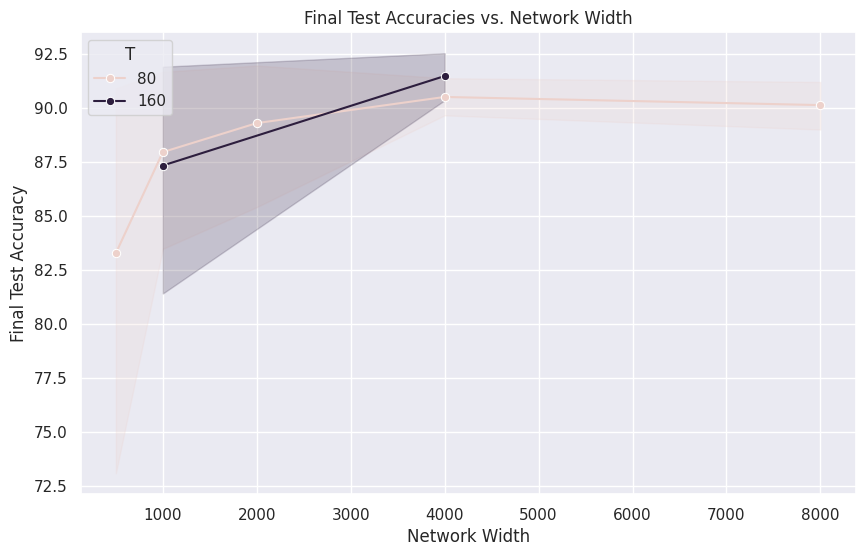

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example load_metrics function
def load_metrics(directory):
    all_data = []
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r') as file:
                data = json.load(file)
                
                row = {
                    'epsilon': data['epsilon'],
                    'clipping_value': data['clipping_value'],
                    'T': data['T'],
                    'lr': data['lr'],
                    'network_width': data['network_width'],
                    'grad_norms': data['grad_norms'],
                    'train_losses': data['train_losses'],
                    'test_losses': data['test_losses'],
                    'test_accuracies': data['test_accuracies'],
                    'filename': filename
                }
                all_data.append(row)
    
    df = pd.DataFrame(all_data)
    return df

# Load DataFrames
directory_1 = './NN/trial_monday_22_07_airport/'
df_1 = load_metrics(directory_1)

directory_2 = './NN/trial_monday_22_07_airport_1/'
df_2 = load_metrics(directory_2)

# Concatenate the dataframes vertically
df = pd.concat([df_1, df_2], axis=0, ignore_index=True)

# Extract the final test accuracy from each array
df['final_test_accuracy'] = df['test_accuracies'].apply(lambda x: x[-1])

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='network_width', y='final_test_accuracy', hue='T', marker='o')
plt.title('Final Test Accuracies vs. Network Width')
plt.xlabel('Network Width')
plt.ylabel('Final Test Accuracy')
plt.legend(title='T')
plt.grid(True)
plt.show()
